In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pickle


In [9]:
# ------------------ DATA DOWNLOAD ------------------
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)
data.reset_index(inplace=True)



C:\Users\win\AppData\Local\Temp\ipykernel_9928\1988049598.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


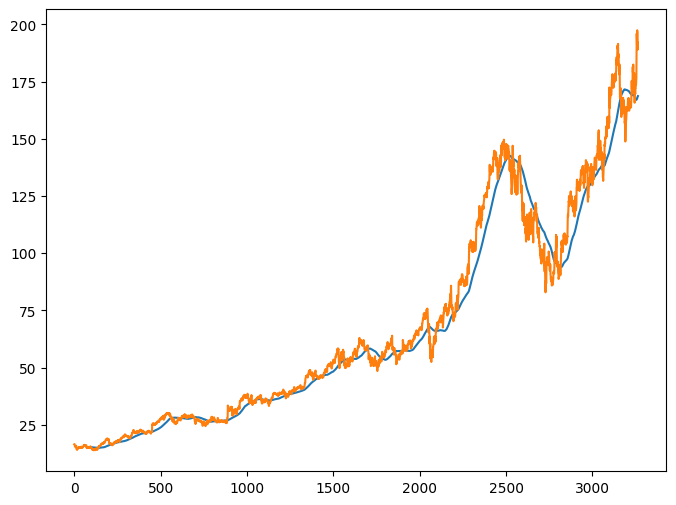

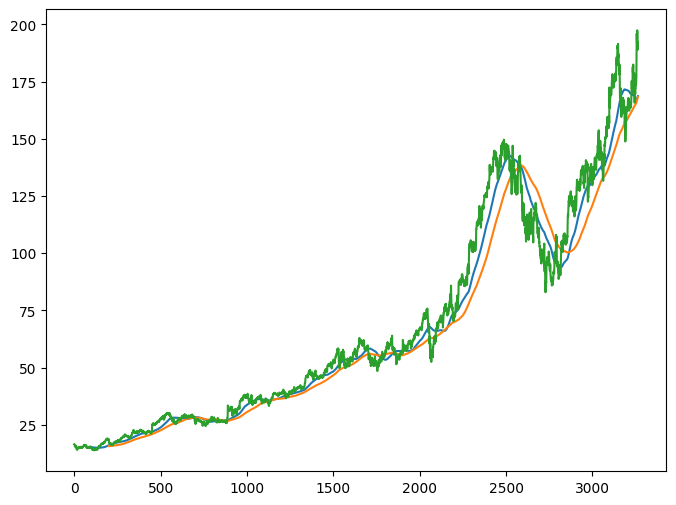

In [10]:
# - MOVING AVERAGES 
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days)
plt.plot(data.Close)
plt.show()

ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days)
plt.plot(ma_200_days)
plt.plot(data.Close)
plt.show()


In [11]:
# ------------------ TRAIN TEST SPLIT ------------------
data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test  = pd.DataFrame(data.Close[int(len(data)*0.80): ])


In [4]:
# ------------------ SCALING ------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)



with open("scaler.pkl", "wb") as f:
   pickle.dump(scaler,f)


NameError: name 'data_train' is not defined

In [13]:
# X , Y CREATION 
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)


In [ ]:
# ------------------ MODEL BUILDING ------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.save("Stock_Predictions_Model.keras")
print("Model saved successfully!")



Model saved successfully!


In [15]:
# ------------------ TRAINING ------------------
model.fit(x, y, epochs=50, batch_size=32, verbose=1)
model.summary()


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 386ms/step - loss: 0.0280
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 373ms/step - loss: 0.0065
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - loss: 0.0055
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 363ms/step - loss: 0.0050
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 364ms/step - loss: 0.0040
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - loss: 0.0045
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 364ms/step - loss: 0.0044
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - loss: 0.0037
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - loss: 0.0038
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 372ms/step - loss: 0.0032
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 387ms/step - loss: 0.0037
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - loss: 0.0033
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 368ms/step - loss: 0.0031
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [17]:
# ------------------ TEST DATA PREP ------------------
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

data_test_scale = scaler.transform(data_test)   #bug fix

x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)



In [18]:
# ------------------ PREDICTION ------------------
y_predict = model.predict(x)

# INVERSE SCALING
y_predict = scaler.inverse_transform(y_predict.reshape(-1,1))
y = scaler.inverse_transform(y.reshape(-1,1))


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step


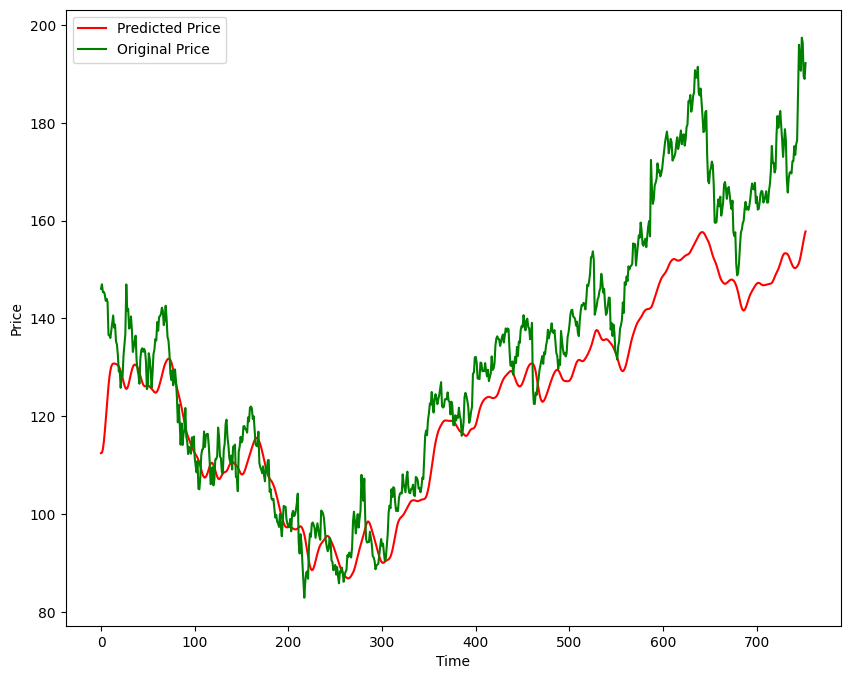

In [21]:
#  PLOTTING 
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#  MODEL SAVE 
model.save("Stock_Predictions_Model.keras")